In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [5]:
df = pd.read_csv('2017.csv')
df.head()

Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0       Norway               1            7.537      7.594445     7.479556   
1      Denmark               2            7.522      7.581728     7.462272   
2      Iceland               3            7.504      7.622030     7.385970   
3  Switzerland               4            7.494      7.561772     7.426227   
4      Finland               5            7.469      7.527542     7.410458   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   
2                  1.480633  1.610574                  0.833552  0.627163   
3                  1.564980  1.516912                  0.858131  0.620071   
4                  1.443572  1.540247                  0.809158  0.617951   

   Generosity  Trust..Government.Corruption.  Dystopia.Residual  
0    0.362012                       0.315964           2.277027  
1    0.355280                       0.400770           2.313707  
2    0.475540                       0.153527           2.322715  
3    0.290549                       0.367007           2.276716  
4    0.245483                       0.382612           2.430182

In [7]:
print("Data ini terdiri dari {:,} baris ".format(df.shape[0]) + "dan {} kolom dalam data".format(df.shape[1]))

Data ini terdiri dari 156 baris dan 12 kolom dalam data


In [8]:
#untuk mendapatkan info lebih lanjut dari data tersebut 
#untuk mengetahui apakah terdapat data kodong atau null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
Country                          156 non-null object
Happiness.Rank                   156 non-null int64
Happiness.Score                  156 non-null float64
Whisker.high                     155 non-null float64
Whisker.low                      155 non-null float64
Economy..GDP.per.Capita.         156 non-null float64
Family                           155 non-null float64
Health..Life.Expectancy.         155 non-null float64
Freedom                          155 non-null float64
Generosity                       155 non-null float64
Trust..Government.Corruption.    155 non-null float64
Dystopia.Residual                155 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 14.8+ KB


In [9]:
#menampikan kolom mana saja yg mempunyai data
df.isnull(). sum()

Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     1
Whisker.low                      1
Economy..GDP.per.Capita.         0
Family                           1
Health..Life.Expectancy.         1
Freedom                          1
Generosity                       1
Trust..Government.Corruption.    1
Dystopia.Residual                1
dtype: int64

In [11]:
#mengahpus data null
dfFix = df.dropna()
dfFix

Country  Happiness.Rank  Happiness.Score  Whisker.high  \
0                      Norway               1            7.537      7.594445   
1                     Denmark               2            7.522      7.581728   
2                     Iceland               3            7.504      7.622030   
3                 Switzerland               4            7.494      7.561772   
4                     Finland               5            7.469      7.527542   
..                        ...             ...              ...           ...   
150                    Rwanda             151            3.471      3.543030   
151                     Syria             152            3.462      3.663669   
152                  Tanzania             153            3.349      3.461430   
153                   Burundi             154            2.905      3.074690   
154  Central African Republic             155            2.693      2.864884   

     Whisker.low  Economy..GDP.per.Capita.    Family  \
0       7.479556                  1.616463  1.533524   
1       7.462272                  1.482383  1.551122   
2       7.385970                  1.480633  1.610574   
3       7.426227                  1.564980  1.516912   
4       7.410458                  1.443572  1.540247   
..           ...                       ...       ...   
150     3.398970                  0.368746  0.945707   
151     3.260331                  0.777153  0.396103   
152     3.236570                  0.511136  1.041990   
153     2.735310                  0.091623  0.629794   
154     2.521116                  0.000000  0.000000   

     Health..Life.Expectancy.   Freedom  Generosity  \
0                    0.796667  0.635423    0.362012   
1                    0.792566  0.626007    0.355280   
2                    0.833552  0.627163    0.475540   
3                    0.858131  0.620071    0.290549   
4                    0.809158  0.617951    0.245483   
..                        ...       ...         ...   
150                  0.326425  0.581844    0.252756   
151                  0.500533  0.081539    0.493664   
152                  0.364509  0.390018    0.354256   
153                  0.151611  0.059901    0.204435   
154                  0.018773  0.270842    0.280876   

     Trust..Government.Corruption.  Dystopia.Residual  
0                         0.315964           2.277027  
1                         0.400770           2.313707  
2                         0.153527           2.322715  
3                         0.367007           2.276716  
4                         0.382612           2.430182  
..                             ...                ...  
150                       0.455220           0.540061  
151                       0.151347           1.061574  
152                       0.066035           0.621130  
153                       0.084148           1.683024  
154                       0.056565           2.066005  

[155 rows x 12 columns]

In [12]:
dfFix.isnull().sum()

Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64

In [14]:
#menghapus kolom yg tdk terpakai/duplikat
df2 = dfFix.drop(['Whisker.high','Whisker.low'], axis=1)

df2.head()

Country  Happiness.Rank  Happiness.Score  Economy..GDP.per.Capita.  \
0       Norway               1            7.537                  1.616463   
1      Denmark               2            7.522                  1.482383   
2      Iceland               3            7.504                  1.480633   
3  Switzerland               4            7.494                  1.564980   
4      Finland               5            7.469                  1.443572   

     Family  Health..Life.Expectancy.   Freedom  Generosity  \
0  1.533524                  0.796667  0.635423    0.362012   
1  1.551122                  0.792566  0.626007    0.355280   
2  1.610574                  0.833552  0.627163    0.475540   
3  1.516912                  0.858131  0.620071    0.290549   
4  1.540247                  0.809158  0.617951    0.245483   

   Trust..Government.Corruption.  Dystopia.Residual  
0                       0.315964           2.277027  
1                       0.400770           2.313707  
2                       0.153527           2.322715  
3                       0.367007           2.276716  
4                       0.382612           2.430182

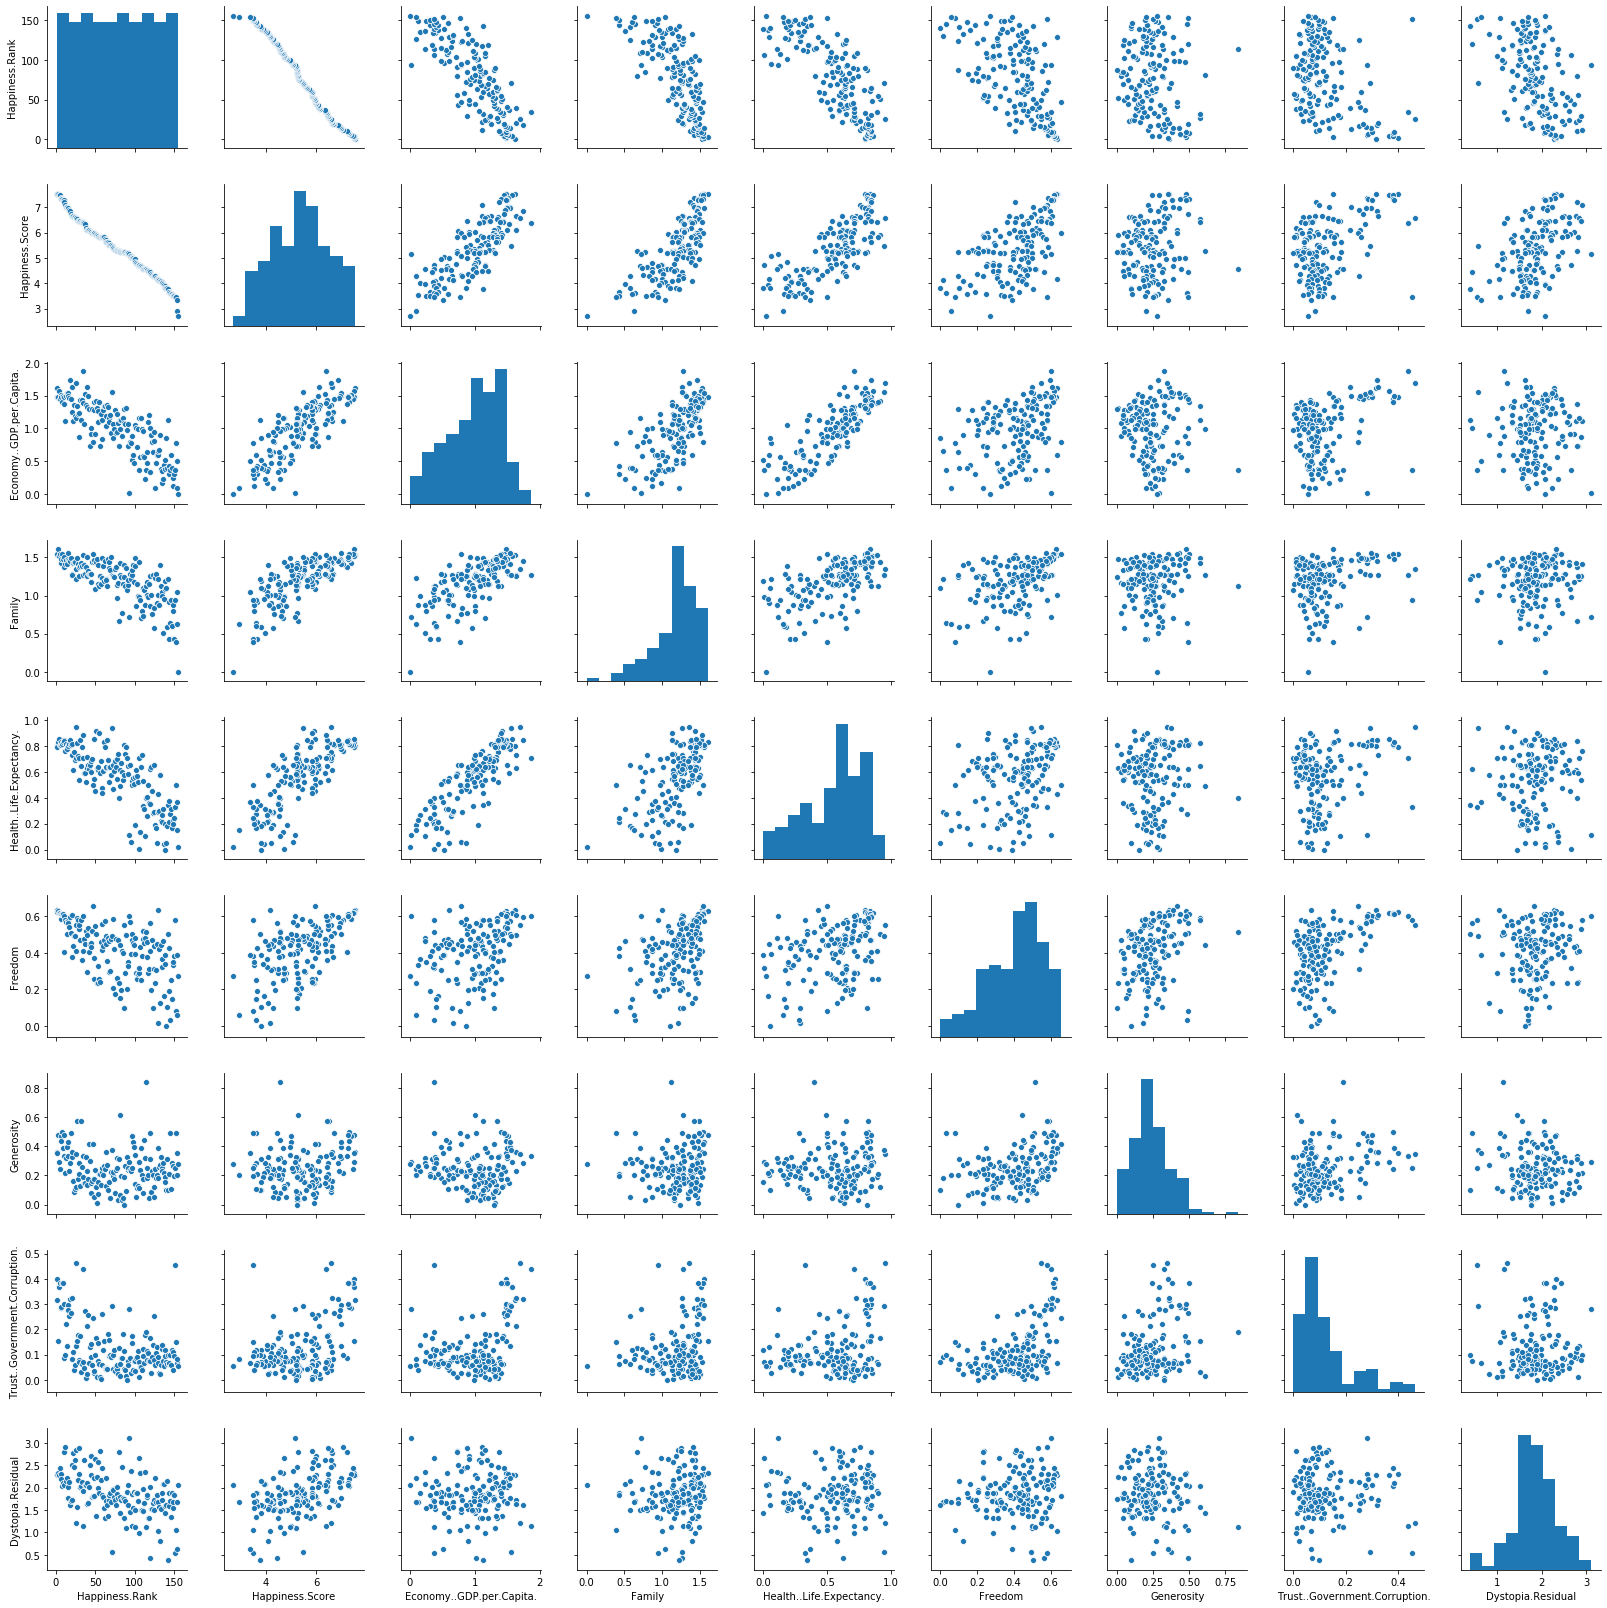

In [15]:
sns.pairplot(df2)

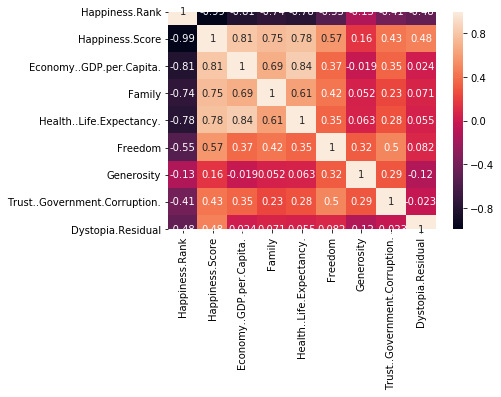

In [16]:
sns.heatmap(df2.corr(), annot=True)

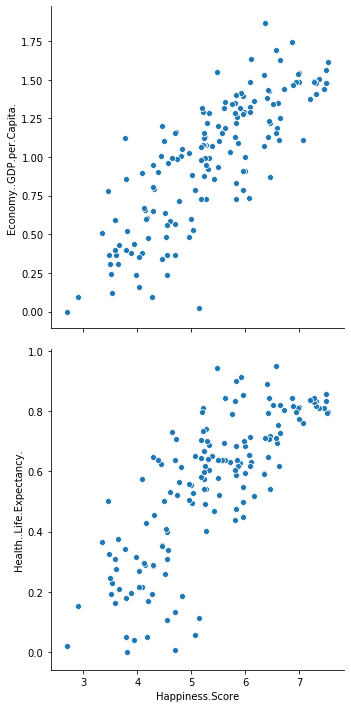

In [20]:
sns.pairplot(data=df2, height=5,
            x_vars=['Happiness.Score'],
            y_vars=['Economy..GDP.per.Capita.','Health..Life.Expectancy.'])

In [22]:
df2.corr(method="pearson", min_periods=20) ["Happiness.Score"].abs().sort_values(ascending=False)

Happiness.Score                  1.000000
Happiness.Rank                   0.992774
Economy..GDP.per.Capita.         0.812469
Health..Life.Expectancy.         0.781951
Family                           0.752737
Freedom                          0.570137
Dystopia.Residual                0.475355
Trust..Government.Corruption.    0.429080
Generosity                       0.155256
Name: Happiness.Score, dtype: float64

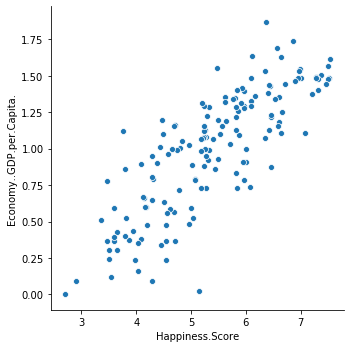

In [23]:
sns.pairplot(data=df2, height=5,
            x_vars=['Happiness.Score'],
            y_vars=['Economy..GDP.per.Capita.'])

In [26]:
#Statistik deskriptif 2 fitur yg terpilih
mina = np.min(df2['Happiness.Score'])
maxa = np.max(df2['Happiness.Score'])
meana = np.mean(df2['Happiness.Score'])
mediana = np.median(df2['Happiness.Score'])
stda = np.std(df2['Happiness.Score'])
vara = np.var(df2['Happiness.Score'])

minb = np.min(df2['Economy..GDP.per.Capita.'])
maxb = np.max(df2['Economy..GDP.per.Capita.'])
meanb = np.mean(df2['Economy..GDP.per.Capita.'])
medianb = np.median(df2['Economy..GDP.per.Capita.'])
stdb = np.std(df2['Economy..GDP.per.Capita.'])
varb = np.var(df2['Economy..GDP.per.Capita.'])

print("Min Happiness Score :",mina, '\t\t\t\tdan Min GDP : ',minb)
print("Max Happiness Score :",maxa, '\t\t\tdan Max GDP : ',maxb)
print("Mean Happiness Score :",meana, '\t\t\tdan Meann GDP : ',meanb)
print("Median Happiness Score :",mediana, '\t\t\tdan Median GDP : ',medianb)
print("Standar Deviation Happiness Score :",stda, '\t\tdan Sandar deviation GDP : ',stdb)
print("Variance Happiness Score :",vara, '\t\t\tdan Variance GDP : ',varb)

Min Happiness Score : 2.6930000780000003 				dan Min GDP :  0.0
Max Happiness Score : 7.537000179 			dan Max GDP :  1.870765686
Mean Happiness Score : 5.354019355774192 			dan Meann GDP :  0.9847182019096775
Median Happiness Score : 5.278999805 			dan Median GDP :  1.0645779370000001
Standar Deviation Happiness Score : 1.1275750558716835 		dan Sandar deviation GDP :  0.41943311718773646
Variance Happiness Score : 1.27142550662403 			dan Variance GDP :  0.1759241397938215


In [28]:
#analisa model linier regression
msk = np.random.rand(len(df2)) < 0.8
train = df2[msk]
test = df2[~msk]

regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Happiness.Score']])
train_y = np.asanyarray(train[['Economy..GDP.per.Capita.']])
regr.fit ( train_x, train_y)
#The coefficients
print ('koefisien : ', regr.coef_)
print ('Intersep: ', regr.intercept_)

koefisien :  [[0.31800709]]
Intersep:  [-0.71640266]


Text(0.5, 0, 'Health..Life.Expectancy.')

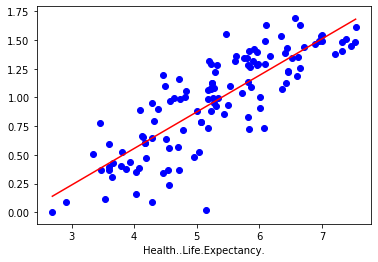

In [30]:
plt.scatter(train[['Happiness.Score']], train[['Economy..GDP.per.Capita.']], color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Happiness.Score")
plt.xlabel("Health..Life.Expectancy.")